# Monte-Carlo Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Problem Desciption
The prior probalibity and likelihoods are given by 
$$p(Y=0|Y=1)=\frac{1}{2}$$
$$p(X=x|Y=0)=2-2x$$
$$p(X=x|Y=1)=2x$$

To use inverse transform sampling, we need to get the CDF(Cumulative Distribution Function) under the condition of $Y=0$ and $Y=1$ respectively.

$$F_0(x) = \int_0^1{p(X=x|Y=0)} = 2x-x^2$$
$$F_1(x) = \int_0^1{p(X=x|Y=1)} = x^2$$

The inverse function of $F_0$ and $F_1$ are as follows:

$$F_0^{-1}(x) = 1-\sqrt{1-x}$$
$$F_1^{-1}(x) = \sqrt{x}$$

In [2]:
def F0_inverse(x):
    return 1-math.sqrt(1-x)

def F1_inverse(x):
    return math.sqrt(x)

def create_data(N):
    """
    Args:
        N: scale of generated data
    Returns:
        X: feture variables
        Y: response
    """
    X = np.random.rand(N)
    Y = np.random.randint(low=0, high=2, size=N) # generate random integer from {0,1}
    for i in range(N):
        if Y[i] == 0:
            X[i] = F0_inverse(X[i])
        if Y[i] == 1:
            X[i] = F1_inverse(X[i])
    return X, Y
        
X, Y = create_data(10000)

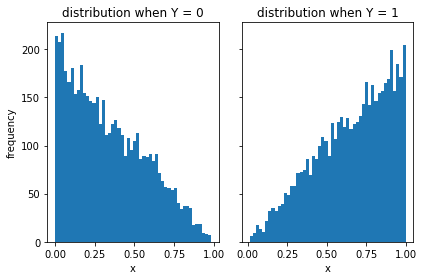

In [3]:
def check_distributon(X, Y):
    X0 = []
    X1 = []
    for i in range(len(Y)):
        if Y[i] == 0:
            X0.append(X[i])
        else:
            X1.append(X[i])
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("frequency")
    axs[1].set_xlabel("x")
    axs[0].set_title("distribution when Y = 0")
    axs[1].set_title("distribution when Y = 1")
    
    axs[0].hist(X0, bins=50)
    axs[1].hist(X1, bins=50)
    
check_distributon(X,Y)

In [13]:
def predict_y(x, threshold, anti=False):
    """
    threshold classifier
    Args:
        x: feature
        threshold: as the name
        anti: apply rule A when anti is False and rule B when anti is True
    """
    ret = 0
    if x<threshold:
        ret = 0
    else:
        ret = 1
    if anti:
        return 1-ret
    else:
        return ret
        
def predict_Y(X, threshold, anti=False):
    predicted_Y = []
    for i in range(len(X)):
        pred_y = predict_y(X[i], threshold, anti)
        predicted_Y.append(pred_y)
    predicted_Y = np.asarray(predicted_Y)
    return predicted_Y
        
def calculate_err(Y, predicted_Y):
    N = len(Y)
    wrong_pred = 0
    for i in range(N):
        if predicted_Y[i] != Y[i]:
            wrong_pred = wrong_pred + 1
    return wrong_pred/N


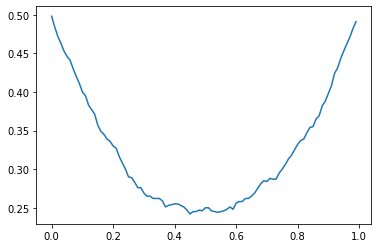

In [14]:
def err_curve(M):
    X, Y = create_data(M)
    threshold = []
    err_rate = []
    for i in np.arange(0,1,0.01):
        predicted_Y = predict_Y(X, i)
        err = calculate_err(Y, predicted_Y)
        threshold.append(i)
        err_rate.append(err)
    fig, ax = plt.subplots()
    ax.plot(threshold, err_rate, label="Rule A")

err_curve(1000)

In [ ]:
def err_statistics()